# Stroke Prediction in Patients  

Stroke is a blood clot or bleeding in the brain which can cause long-term neurological damage and complications. stroke doesn't only cost medical financial burden and permanent disability but can eventually lead to death. Prevention and early detection of a stroke risk has many benefits on the patient and healthcare system.

This project predicts whether a person is at risk of having a stroke or not. They will get benefit from this project Patients and healthcare workers.


# Importing Libraries

In [1408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##################################
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import  cross_val_score
##################################
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans 
##################################
from imblearn.over_sampling import SMOTE
#####################################
import warnings
warnings.filterwarnings(action='ignore')

# Read Dataset 

The dataset source is Kaggle.

In [1409]:
d=pd.read_csv('healthcare-dataset-stroke-data.csv')

# Explore Data Set

It is containing 5110 records and12 features. Record contains patient information and if patient had a stroke or not. Target features (stroke)=1 if the patient had a stroke or 0 if not.

Features:

1- id: Unique id.
2- gender: "Male "or "Female"or "Other".
3- age: age of the patient.
4- hypertension: binary feature (0 if the patient doesn't have hypertension,1 if the patient has hypertension).
5- heart_disease: binary feature (0 if the patient doesn't have any heart diseases,1 if the patient has heart diseases.
6- ever_married:"Yes" or "No".
7- work_type:" children"," Private"," Self-employed'," Govt_job" or " Never_worked".
8- Residence_type:" Rural" or " Urban".
9- avg_glucose_level: Average glucose level in blood.
10- bmi: Body Mass Index.
11-smoking_status:" never smoked"," formerly smoked"," smokes"," Unknown".
12- stroke:1 if the patient had a stroke or 0 if not.

In [1410]:
#displaying top 5 rows
d.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [1411]:
#displaying last 5 rows
d.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [1412]:
#Showing number of rows and colums in dataset 
d.shape

(5110, 12)

In [1413]:
#showing information about dataset
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [1414]:
#Showing dataset statistical features
d.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [1415]:
#Showing the number of null value and wher is it
d.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [1416]:
#Showing the names of colums
d.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Visualization

### 1-Stroke:

Text(0.5, 1.0, 'imbalanced Dataset')

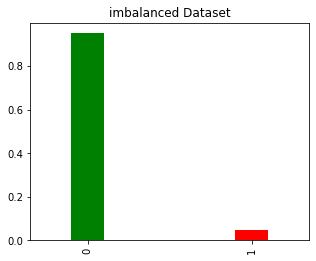

In [1417]:
fig, axes = plt.subplots(figsize=(5, 4))
d['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('green','red'))
plt.title('imbalanced Dataset')

### 2-Gender:

Text(0.5, 1.0, 'Females is more than Males')

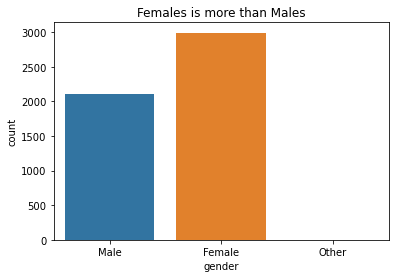

In [1418]:
sns.countplot(data=d,x='gender')
plt.title('Females is more than Males')

Text(0.5, 1.0, 'There is not much difference between stroke rate concerning gender.')

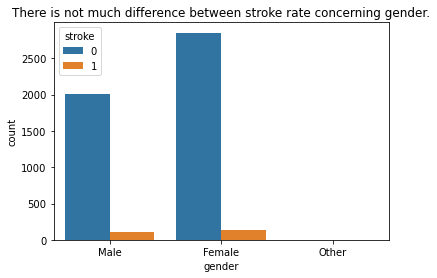

In [1419]:
sns.countplot(data=d,x='gender',hue='stroke')
plt.title('There is not much difference between stroke rate concerning gender.')

### 3-Age:

Text(0.5, 1.0, 'So many people in this dataset in range age 40 to 80 ')

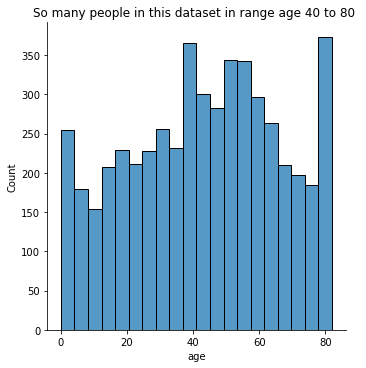

In [1420]:
sns.displot(d['age'])
plt.title('So many people in this dataset in range age 40 to 80 ')

Text(0.5, 1.0, 'People aged more than 60 years tend to have a stroke.\nSome outliers can be seen as people below age 20 are having a stroke.')

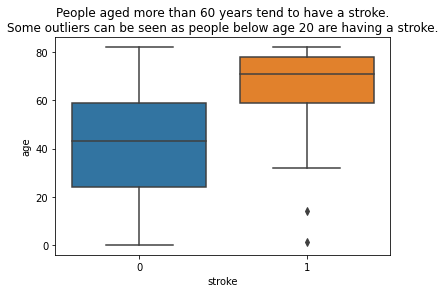

In [1421]:
sns.boxplot(data=d,x='stroke',y='age')
plt.title('People aged more than 60 years tend to have a stroke.\nSome outliers can be seen as people below age 20 are having a stroke.')

### 4-Heart_Disease:

Text(0.5, 1.0, 'So many people in this dataset dose not contane heart disease')

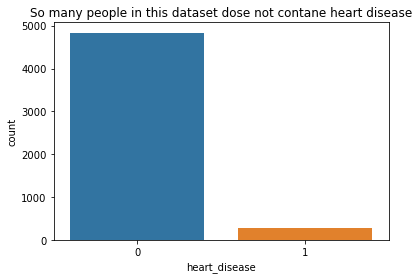

In [1422]:
sns.countplot(data=d,x='heart_disease')
plt.title('So many people in this dataset dose not contane heart disease')

Text(0.5, 1.0, 'heart_disease & stroke')

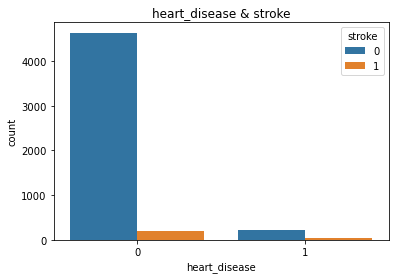

In [1423]:
sns.countplot(data=d,x='heart_disease',hue='stroke')
plt.title('heart_disease & stroke')

### 5-Ever_Married:

Text(0.5, 1.0, 'So many people in this dataset married')

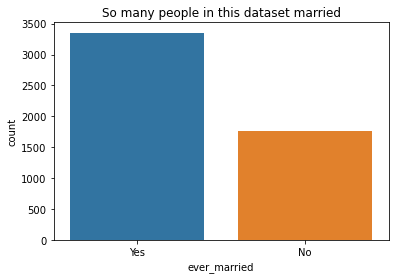

In [1424]:
sns.countplot(data=d,x='ever_married')
plt.title('So many people in this dataset married')

Text(0.5, 1.0, 'People who are married have a higher stroke rate.')

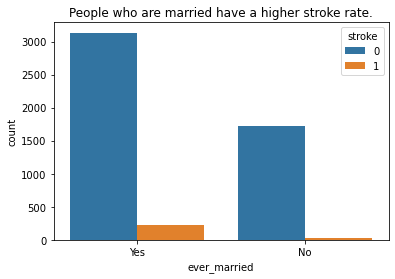

In [1425]:
sns.countplot(data=d,x='ever_married',hue='stroke')
plt.title('People who are married have a higher stroke rate.')

### 6-work_type:

Text(0.5, 1.0, 'So many people in this dataset have work type=private')

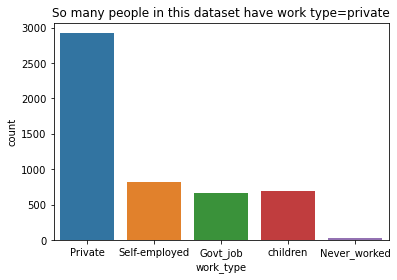

In [1426]:
sns.countplot(data=d,x='work_type')
plt.title('So many people in this dataset have work type=private')

Text(0.5, 1.0, 'People working in the private sector have a higher risk of getting a stroke.\nAnd people who have never worked have a very less stroke rate.')

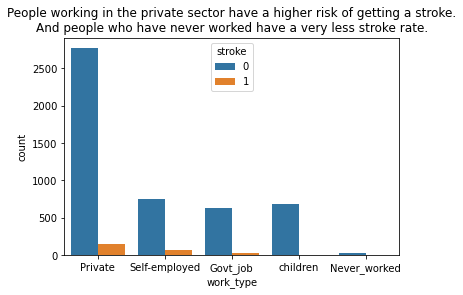

In [1427]:
sns.countplot(data=d,x='work_type',hue='stroke')
plt.title('People working in the private sector have a higher risk of getting a stroke.\nAnd people who have never worked have a very less stroke rate.')

### 7-Residence_type:

Text(0.5, 1.0, 'There not much difference in both attribute values.')

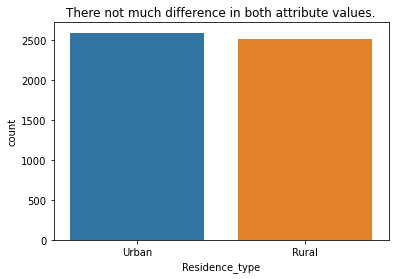

In [1428]:
sns.countplot(data=d,x='Residence_type')
plt.title('There not much difference in both attribute values.')

Text(0.5, 1.0, 'There not much difference in both attribute values.')

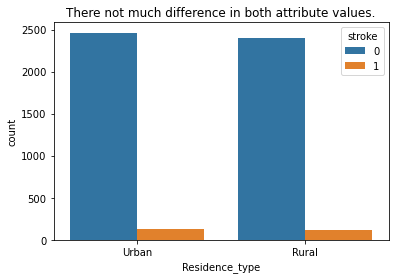

In [1429]:
sns.countplot(data=d,x='Residence_type',hue='stroke')
plt.title('There not much difference in both attribute values.')

### 8-Avg_Glucose_Level:

Text(0.5, 1.0, 'avg_glucose_level')

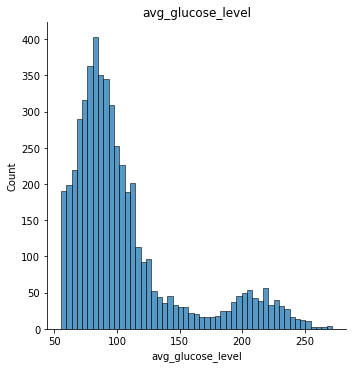

In [1430]:
sns.displot(d['avg_glucose_level'])
plt.title('avg_glucose_level')

Text(0.5, 1.0, 'People having stroke have an average glucose level of more than 100.')

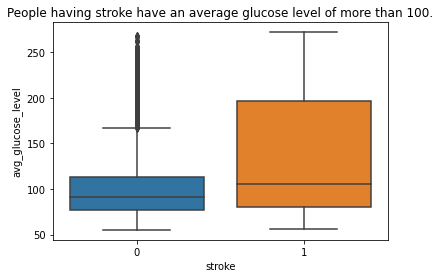

In [1431]:
sns.boxplot(data=d,x='stroke',y='avg_glucose_level')
plt.title('People having stroke have an average glucose level of more than 100.')

### 9-Bmi:

Text(0.5, 1.0, 'BMI')

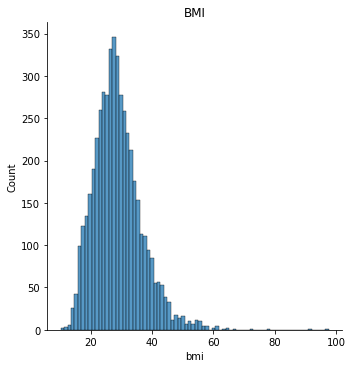

In [1432]:
sns.displot(d['bmi'])
plt.title('BMI')

Text(0.5, 1.0, ' BMI & stroke')

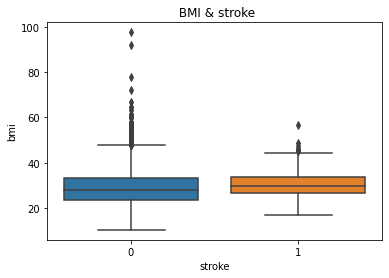

In [1433]:
sns.boxplot(data=d,x='stroke',y='bmi')
plt.title(' BMI & stroke')

### 10-Smoking_Status:

Text(0.5, 1.0, 'So many people in this dataset are never smoked')

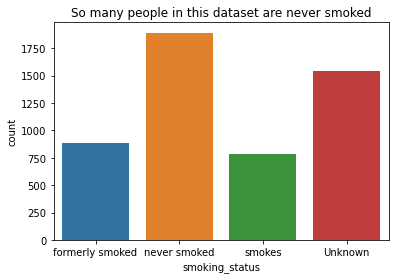

In [1434]:
sns.countplot(data=d,x='smoking_status')
plt.title('So many people in this dataset are never smoked')

Text(0.5, 1.0, 'There is not much difference in the chances of stroke irrespective of smoking status.')

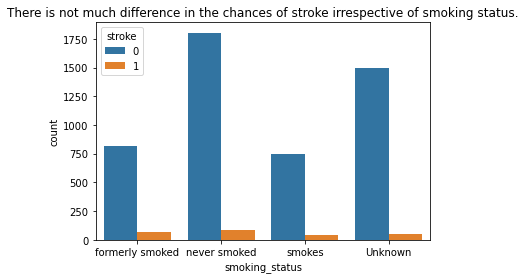

In [1435]:
sns.countplot(data=d,x='smoking_status',hue='stroke')
plt.title('There is not much difference in the chances of stroke irrespective of smoking status.')

# Handling Missing Values:

In [1436]:
imp_KNN=KNNImputer(n_neighbors=4)
d['bmi']=imp_KNN.fit_transform(d[['bmi']])
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Handling Columns:

In [1437]:
#Handle smoking_status column
smoking = pd.get_dummies(d[['smoking_status']], drop_first= True)
smoking.head(2)

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,1,0


In [1438]:
#Handle gender column
gender = pd.get_dummies(d[['gender']], drop_first= True)
gender.head(2)

,gender_Male,gender_Other
0,1,0
1,0,0


In [1439]:
#Handle ever_married column
d['ever_married']=d['ever_married'].replace({'No':0,'Yes':1})
married.head(2)

,ever_married_Yes
0,1
1,1


In [1440]:
#Handle Residence_type column
d['Residence_type']=d['Residence_type'].replace({'Rural':0,'Urban':1})
residence.head(2)

,Residence_type_Urban
0,1
1,0


In [1441]:
#Handle work_type column
work = pd.get_dummies(d[['work_type']], drop_first= True)
work.head(2)

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0
1,0,0,1,0


In [1442]:
data = pd.concat([d, gender, work, smoking], axis = 1)
data = data.drop(columns=['gender', 'work_type','smoking_status'], axis=1)


In [1443]:
#showing information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   Residence_type                  5110 non-null   int64  
 6   avg_glucose_level               5110 non-null   float64
 7   bmi                             5110 non-null   float64
 8   stroke                          5110 non-null   int64  
 9   gender_Male                     5110 non-null   uint8  
 10  gender_Other                    5110 non-null   uint8  
 11  work_type_Never_worked          5110 non-null   uint8  
 12  work_type_Private               51

In [1444]:
data.isna().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
gender_Other                      0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

# Correlation

<AxesSubplot:>

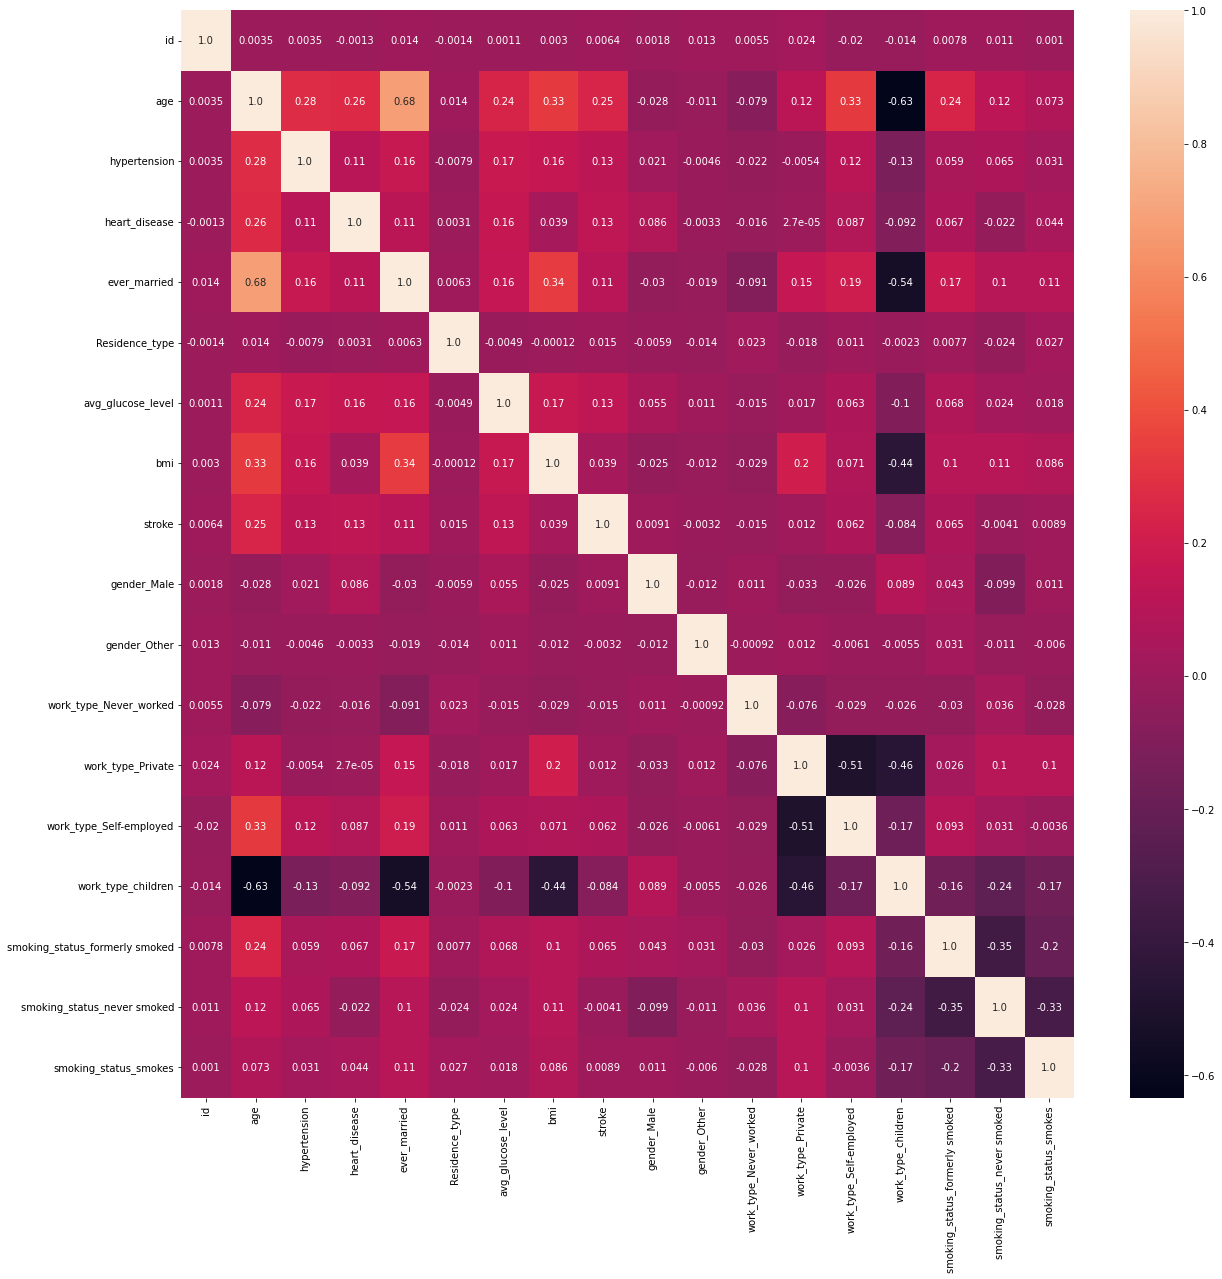

In [1445]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,fmt='.2')

1-The (age) has (0.25) high correlation with (stroke).
2-(Hypertension)- (heart _disease) and (avg_glucose_ level) have (0.13) correlation with (stroke).
3-The (ever_ married) has (0.11) correlation with (stroke).
4-The (age) has (0.68) correlation with (ever_ married).

# Train & Test Split  And Scale

In [1446]:
X= data.drop('stroke', axis=1)

In [1447]:
Y = data['stroke']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [1448]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [1449]:
 #Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=1)

In [1450]:
# Shape of data 
X_train.shape,X_test.shape,y_train.shape,y_test .shape

((3577, 17), (1533, 17), (3577,), (1533,))

# Machine Learning Models

#### 1-Logistic Regression(Training & Accuracy ):

In [1451]:
#Training
LG = LogisticRegression()
LG_model=LG.fit(X_train, y_train)

In [1452]:
# accuracy 
LG.score(X_test,y_test)*100

94.45531637312459

In [1453]:
#f1_score
y_pred_LG= LG.predict(X_test)
f1_score(y_test,y_pred_LG)

0.02298850574712644

In [1454]:
#confusion_matrix
confusion_matrix(y_test,y_pred_LG)

array([[1447,    3],
       [  82,    1]], dtype=int64)

In [1455]:
crosscore_LG =cross_val_score(LG, X_test, y_test, cv = 10).mean() 
cross_val_score(LG, X_test, y_test, cv = 10).mean()

0.9432603344368051

#### 2-Decision Tree Classifier(Training & Accuracy ):

In [1456]:
#Training 
D = DecisionTreeClassifier(random_state=1)
D_model=D.fit(X_train, y_train)

In [1457]:
# accuracy 
D.score(X_test,y_test)*100

91.51989562948467

In [1458]:
#f1_score
y_pred_D = D.predict(X_test)
f1_score(y_test, y_pred_D)

0.19753086419753085

In [1459]:
#confusion_matrix
confusion_matrix(y_test,y_pred_D)

array([[1387,   63],
       [  67,   16]], dtype=int64)

In [1460]:
crosscore_D =cross_val_score(D, X_test, y_test, cv = 10).mean() 
cross_val_score(D, X_test, y_test, cv = 10).mean()

0.9053985230455819

#### 3-Support Vector Machine(Training & Accuracy ):

In [1461]:
#Training 
S= SVC()
S_model=S.fit(X_train, y_train)

In [1462]:
# accuracy 
S.score(X_test,y_test)*100

94.58577951728635

In [1463]:
#f1_score
y_pred_S = S.predict(X_test)
f1_score(y_test, y_pred_S)

0.0

In [1464]:
#confusion_matrix
confusion_matrix(y_test,y_pred_S)

array([[1450,    0],
       [  83,    0]], dtype=int64)

In [1465]:
crosscore_S =cross_val_score(S, X_test, y_test, cv = 10).mean() 
cross_val_score(S, X_test, y_test, cv = 10).mean()

0.94586622527799

#### 4-Random Forest Classifier(Training & Accuracy ):

In [1466]:
#Training 
RF = RandomForestClassifier()
RF_model=RF.fit(X_train, y_train)

In [1467]:
# accuracy
RF.score(X_test,y_test)*100

94.45531637312459

In [1468]:
#f1_score
y_pred_RF = RF.predict(X_test)
f1_score(y_test, y_pred_RF)

0.0

In [1469]:
#confusion_matrix
confusion_matrix(y_test,y_pred_RF)

array([[1448,    2],
       [  83,    0]], dtype=int64)

In [1470]:
crosscore_RF =cross_val_score(RF, X_test, y_test, cv = 10).mean() 
cross_val_score(RF, X_test, y_test, cv = 10).mean()

0.9452126305067482

#### 5-KNeighbors Classifier(Training & Accuracy ):

In [1471]:
#Training
K= KNeighborsClassifier()
K_model=K.fit(X_train, y_train)

In [1472]:
# accuracy 
K.score(X_test,y_test)*100

94.58577951728635

In [1473]:
#f1_score
y_pred_K = K.predict(X_test)
f1_score(y_test, y_pred_K)

0.023529411764705882

In [1474]:
#confusion_matrix
confusion_matrix(y_test, y_pred_K)

array([[1449,    1],
       [  82,    1]], dtype=int64)

In [1475]:
crosscore_K =cross_val_score(K, X_test, y_test, cv = 10).mean() 
cross_val_score(K, X_test, y_test, cv = 10).mean()

0.943913929208047

#### 6-GaussianNB(Training & Accuracy ):

In [1476]:
#Training
NB = GaussianNB()
NB_model=NB.fit(X_train, y_train)

In [1477]:
# accuracy 
NB.score(X_test,y_test)*100

92.82452707110241

In [1478]:
#f1_score
y_pred_NB = NB.predict(X_test)
f1_score(y_test, y_pred_NB)

0.26666666666666666

In [1479]:
#confusion_matrix
confusion_matrix(y_test, y_pred_NB)

array([[1403,   47],
       [  63,   20]], dtype=int64)

In [1480]:
crosscore_NB =cross_val_score(NB, X_test, y_test, cv = 10).mean() 
cross_val_score(NB, X_test, y_test, cv = 10).mean()

0.9099864188099482

#### 7-Support Vector Machine (Linear Kernel)(Training & Accuracy ):

In [1481]:
#Training
L_S=LinearSVC()
L_S.fit(X_train, y_train)

LinearSVC()

In [1482]:
# accuracy 
L_S.score(X_test,y_test)*100

94.58577951728635

In [1483]:
#f1_score
y_pred_L_S = L_S.predict(X_test)
f1_score(y_test, y_pred_L_S)

0.0

In [1484]:
#confusion_matrix
confusion_matrix(y_test,y_pred_L_S)

array([[1450,    0],
       [  83,    0]], dtype=int64)

In [1485]:
crosscore_L_S =cross_val_score(L_S, X_test, y_test, cv = 10).mean() 
cross_val_score(L_S, X_test, y_test, cv = 10).mean()

0.83001443001443

#### 8-Neural Network(Training & Accuracy ):

In [1486]:
#Training
ML=MLPClassifier()
ML.fit(X_train, y_train)

MLPClassifier()

In [1487]:
# accuracy
ML.score(X_test,y_test)*100

94.52054794520548

In [1488]:
#f1_score
y_pred_ML = ML.predict(X_test)
f1_score(y_test, y_pred_ML)

0.0

In [1489]:
#confusion_matrix
confusion_matrix(y_test,y_pred_ML)

array([[1449,    1],
       [  83,    0]], dtype=int64)

In [1490]:
crosscore_ML =cross_val_score(ML, X_test, y_test, cv = 10).mean() 
cross_val_score(ML, X_test, y_test, cv = 10).mean()

0.930833545539428

#### 9-Gradient Boosting (Training & Accuracy ):

In [1491]:
#Training
GR=GradientBoostingClassifier()
GR.fit(X_train, y_train)

GradientBoostingClassifier()

In [1492]:
# accuracy 
GR.score(X_test,y_test)*100

94.52054794520548

In [1493]:
#f1_score
y_pred_GR = GR.predict(X_test)
f1_score(y_test, y_pred_GR)

0.045454545454545456

In [1494]:
#confusion_matrix
confusion_matrix(y_test,y_pred_GR)

array([[1447,    3],
       [  81,    2]], dtype=int64)

In [1495]:
crosscore_GR =cross_val_score(GR, X_test, y_test, cv = 10).mean() 
cross_val_score(GR, X_test, y_test, cv = 10).mean()

0.9386979034037857

#### 10-Cat Boost Classifier (Training & Accuracy ):

In [1496]:
#Training
CAT=CatBoostClassifier(verbose=0)
CAT.fit(X_train, y_train)

In [1497]:
# accuracy
CAT.score(X_test,y_test)*100

94.25962165688193

In [1498]:
#f1_score
y_pred_CAT = CAT.predict(X_test)
f1_score(y_test, y_pred_CAT)

0.0

In [1499]:
#confusion_matrix
confusion_matrix(y_test,y_pred_CAT)

array([[1445,    5],
       [  83,    0]], dtype=int64)

In [1500]:
crosscore_CAT =cross_val_score(CAT, X_test, y_test, cv = 10).mean() 
cross_val_score(CAT, X_test, y_test, cv = 10).mean()

0.9386851710381123

#### 11-LGBM Classifier (Training & Accuracy ):

In [1501]:
#Training
LGB=LGBMClassifier()
LGB.fit(X_train, y_train)

LGBMClassifier()

In [1502]:
# accuracy
LGB.score(X_test,y_test)*100

93.9334637964775

In [1503]:
#f1_score
y_pred_LGB = LGB.predict(X_test)
f1_score(y_test, y_pred_LGB)

0.0

In [1504]:
#confusion_matrix
confusion_matrix(y_test,y_pred_LGB)

array([[1440,   10],
       [  83,    0]], dtype=int64)

In [1505]:
crosscore_LGB =cross_val_score(LGB, X_test, y_test, cv = 10).mean() 
cross_val_score(LGB, X_test, y_test, cv = 10).mean()

0.9360750360750361

#### 12- XGB Classifier(Training & Accuracy ):

In [1506]:
#Training
XGB= XGBClassifier(eval_metric='mlogloss')
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1507]:
# accuracy
XGB.score(X_test,y_test)*100

93.99869536855839

In [1508]:
#f1_score
y_pred_XGB = XGB.predict(X_test)
f1_score(y_test, y_pred_XGB)

0.061224489795918366

In [1509]:
#confusion_matrix
confusion_matrix(y_test,y_pred_LGB)

array([[1440,   10],
       [  83,    0]], dtype=int64)

In [1510]:
crosscore_XGB =cross_val_score(XGB, X_test, y_test, cv = 10).mean() 
cross_val_score(XGB, X_test, y_test, cv = 10).mean()

0.93346490111196

# Handling Class Imbalance 

In [1511]:
smote=SMOTE()
X__train,y__train=smote.fit_resample(X_train,y_train)
X__test,y__test=smote.fit_resample(X_test,y_test)

In [1512]:
X__train.shape,X__test.shape,y__train.shape,y__test .shape

((6822, 17), (2900, 17), (6822,), (2900,))

In [1513]:
y__train.value_counts()

0    3411
1    3411
Name: stroke, dtype: int64

# Machine Learning Models After Handling Imbalance

#### 1-Logistic Regression(Training & Accuracy ):

In [1514]:
#Training
LG_ = LogisticRegression()
LG_model=LG_.fit(X__train, y__train)

In [1515]:
# accuracy 
LG_.score(X_test,y_test)*100

81.40900195694715

In [1516]:
#f1_score
y_pred_LG_= LG_.predict(X_test)
f1_score(y_test,y_pred_LG_)

0.223433242506812

In [1517]:
#confusion_matrix
confusion_matrix(y_test,y_pred_LG_)

array([[1207,  243],
       [  42,   41]], dtype=int64)

In [1518]:
crosscore_LG_ =cross_val_score(LG_, X__test, y__test, cv = 10).mean() 
cross_val_score(LG_, X__test, y__test, cv = 10).mean()

0.8127586206896552

#### 2-Decision Tree Classifier(Training & Accuracy ):


In [1519]:
#Training 
D_ = DecisionTreeClassifier(random_state=1)
D_model=D_.fit(X__train, y__train)

In [1520]:
# accuracy 
D_.score(X_test,y_test)*100

86.36660143509458

In [1521]:
#f1_score
y_pred_D_=D_.predict(X_test)
f1_score(y_test,y_pred_D_)

0.09523809523809526

In [1522]:
#confusion_matrix
confusion_matrix(y_test, y_pred_D_)

array([[1313,  137],
       [  72,   11]], dtype=int64)

In [1523]:
crosscore_D_ =cross_val_score(D_, X__test, y__test, cv = 10).mean() 
cross_val_score(D_, X__test, y__test, cv = 10).mean()

0.9179310344827586

#### 3-Support Vector Machine(Training & Accuracy ):

In [1544]:
#Training 
S_= SVC()
S_model=S_.fit(X__train, y__train)

In [1545]:
# accuracy 
S_.score(X_test,y_test)*100

75.27723418134377

In [1546]:
#f1_score
y_pred_S_=S_.predict(X_test)
f1_score(y_test,y_pred_S_)

0.08232445520581114

In [1547]:
#confusion_matrix
confusion_matrix(y_test, y_pred_S_)

array([[1137,  313],
       [  66,   17]], dtype=int64)

In [1548]:
crosscore_S_ =cross_val_score(S_, X__test, y__test, cv = 10).mean() 
cross_val_score(S_, X__test, y__test, cv = 10).mean()

0.5313793103448277

#### 4-Random Forest Classifier(Training & Accuracy ):

In [1529]:
#Training 
RF_ = RandomForestClassifier()
RF_model=RF_.fit(X__train, y__train)

In [1530]:
# accuracy 
RF_.score(X_test,y_test)*100

90.28049575994781

In [1531]:
#f1_score
y_pred_RF_=RF_.predict(X_test)
f1_score(y_test,y_pred_RF_)

0.07453416149068322

In [1532]:
#confusion_matrix
confusion_matrix(y_test, y_pred_RF_)

array([[1378,   72],
       [  77,    6]], dtype=int64)

In [1533]:
crosscore_RF_ =cross_val_score(RF_, X__test, y__test, cv = 10).mean() 
cross_val_score(RF_, X__test, y__test, cv = 10).mean()

0.95

#### 5-KNeighbors Classifier(Training & Accuracy ):

In [1549]:
#Training
K_= KNeighborsClassifier()
K_model=K_.fit(X__train, y__train)

In [1550]:
# accuracy 
K_.score(X_test,y_test)*100

69.79778212654925

In [1551]:
#f1_score
y_pred_K_=K_.predict(X_test)
f1_score(y_test,y_pred_K_)

0.14732965009208104

In [1552]:
#confusion_matrix
confusion_matrix(y_test, y_pred_K_)

array([[1030,  420],
       [  43,   40]], dtype=int64)

In [1553]:
crosscore_K_ =cross_val_score(K_, X__test, y__test, cv = 10).mean() 
cross_val_score(K_, X__test, y__test, cv = 10).mean()

0.7151724137931035

#### 6-GaussianNB(Training & Accuracy ):

In [1554]:
#Training
NB_ = GaussianNB()
NB_model=NB_.fit(X__train, y__train)

In [1555]:
# accuracy 
NB_.score(X_test,y_test)*100

67.9712981082844

In [1556]:
#f1_score
y_pred_NB_=NB_.predict(X_test)
f1_score(y_test,y_pred_NB_)

0.23161189358372455

In [1557]:
#confusion_matrix
confusion_matrix(y_test, y_pred_NB_)

array([[968, 482],
       [  9,  74]], dtype=int64)

In [1558]:
crosscore_NB_ =cross_val_score(NB_, X__test, y__test, cv = 10).mean() 
cross_val_score(NB_, X__test, y__test, cv = 10).mean()

0.829655172413793

#### 7-Support Vector Machine (Linear Kernel)(Training & Accuracy ):

In [1559]:
#Training
L_S_=LinearSVC()
L_S_.fit(X__train, y__train)

LinearSVC()

In [1560]:
# accuracy 
L_S_.score(X_test,y_test)*100

94.12915851272015

In [1561]:
#f1_score
y_pred_L_S_=L_S_.predict(X_test)
f1_score(y_test,y_pred_L_S_)

0.1176470588235294

In [1562]:
#confusion_matrix
confusion_matrix(y_test, y_pred_L_S_)

array([[1437,   13],
       [  77,    6]], dtype=int64)

In [1563]:
crosscore_L_S_ =cross_val_score(L_S_, X__test, y__test, cv = 10).mean() 
cross_val_score(L_S_, X__test, y__test, cv = 10).mean()

0.6986206896551724

#### 8-Neural Network(Training & Accuracy ):

In [1564]:
#Training
ML_=MLPClassifier()
ML_.fit(X__train, y__train)

MLPClassifier()

In [1565]:
# accuracy 
ML_.score(X_test,y_test)*100

93.47684279191128

In [1566]:
#f1_score
y_pred_ML_=ML_.predict(X_test)
f1_score(y_test,y_pred_ML_)

0.13793103448275862

In [1567]:
#confusion_matrix
confusion_matrix(y_test, y_pred_ML_)

array([[1425,   25],
       [  75,    8]], dtype=int64)

In [1568]:
crosscore_ML_ =cross_val_score(ML_, X__test, y__test, cv = 10).mean() 
cross_val_score(ML_, X__test, y__test, cv = 10).mean()

0.5372413793103449

#### 9-=GradientBoostingClassifier(Training & Accuracy ):

In [1569]:
#Training
GR_=GradientBoostingClassifier()
GR_.fit(X__train, y__train)

GradientBoostingClassifier()

In [1570]:
# accuracy 
GR_.score(X_test,y_test)*100

86.2361382909328

In [1571]:
#f1_score
y_pred_GR_=GR_.predict(X_test)
f1_score(y_test,y_pred_GR_)

0.1316872427983539

In [1572]:
#confusion_matrix
confusion_matrix(y_test, y_pred_GR_)

array([[1306,  144],
       [  67,   16]], dtype=int64)

In [1573]:
crosscore_GR_ =cross_val_score(GR_, X__test, y__test, cv = 10).mean() 
cross_val_score(GR_, X__test, y__test, cv = 10).mean()

0.9241379310344829

#### 10-Cat Boost Classifier (Training & Accuracy ):

In [1574]:
#Training
CAT_=CatBoostClassifier(verbose=0)
CAT_.fit(X__train, y__train)

In [1575]:
# accuracy 
CAT_.score(X_test,y_test)*100

89.49771689497716

In [1576]:
#f1_score
y_pred_CAT_=CAT_.predict(X_test)
f1_score(y_test,y_pred_CAT_)

0.11049723756906078

In [1577]:
#confusion_matrix
confusion_matrix(y_test, y_pred_CAT_)

array([[1362,   88],
       [  73,   10]], dtype=int64)

In [1578]:
crosscore_CAT_ =cross_val_score(CAT_, X__test, y__test, cv = 10).mean() 
cross_val_score(CAT_, X__test, y__test, cv = 10).mean()

0.9479310344827587

#### 11-LGBM Classifier (Training & Accuracy ):

In [1579]:
#Training
LGB_=LGBMClassifier()
LGB_.fit(X__train, y__train)

LGBMClassifier()

In [1580]:
# accuracy 
LGB_.score(X_test,y_test)*100

90.08480104370516

In [1581]:
#f1_score
y_pred_LGB_=LGB_.predict(X_test)
f1_score(y_test,y_pred_LGB_)

0.07317073170731707

In [1582]:
#confusion_matrix
confusion_matrix(y_test, y_pred_LGB_)

array([[1375,   75],
       [  77,    6]], dtype=int64)

In [1583]:
crosscore_LGB_ =cross_val_score(LGB_, X__test, y__test, cv = 10).mean() 
cross_val_score(LGB_, X__test, y__test, cv = 10).mean()

0.9537931034482761

#### 12- XGB Classifier(Training & Accuracy ):

In [1584]:
#Training
XGB_= XGBClassifier(eval_metric='mlogloss')
XGB_.fit(X__train, y__train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1585]:
# accuracy 
XGB_.score(X_test,y_test)*100

90.67188519243314

In [1586]:
#f1_score
y_pred_XGB_=XGB_.predict(X_test)
f1_score(y_test,y_pred_XGB_)

0.12269938650306748

In [1587]:
#confusion_matrix
confusion_matrix(y_test, y_pred_XGB_)

array([[1380,   70],
       [  73,   10]], dtype=int64)

In [1588]:
crosscore_XGB_ =cross_val_score(XGB_, X__test, y__test, cv = 10).mean() 
cross_val_score(XGB_, X__test, y__test, cv = 10).mean()

0.9524137931034483

# Unsupervised Learning Models

In [1589]:
#Training
Kmeans=KMeans(n_clusters=2)
K_mod=Kmeans.fit(X)

In [1590]:
pd.crosstab(Y,K_mod.labels_)


col_0,0,1
stroke,,
0,2371,2490
1,121,128
